# DSP - Lista 4

In [32]:
# Dependências
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.linalg import circulant

## Exercício 4.11

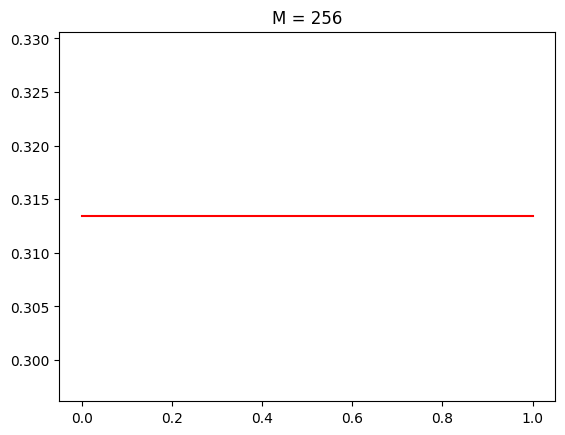

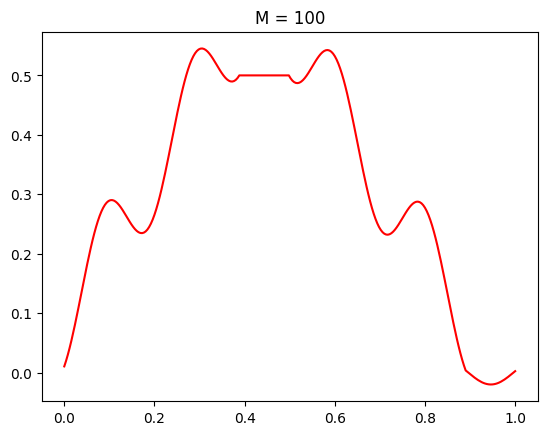

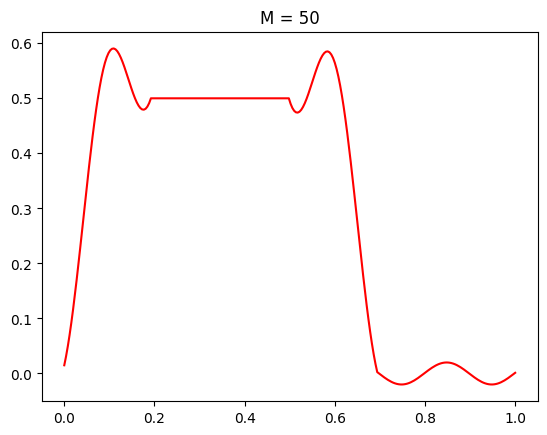

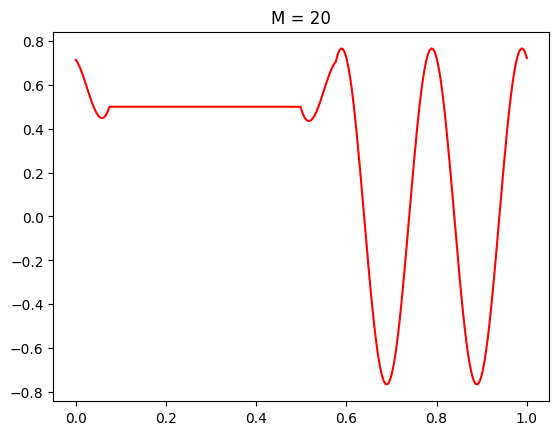

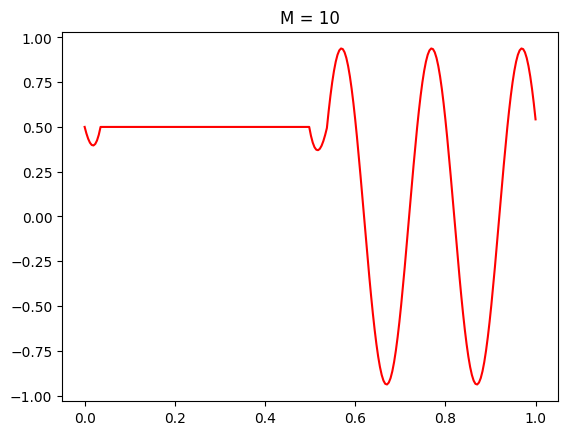

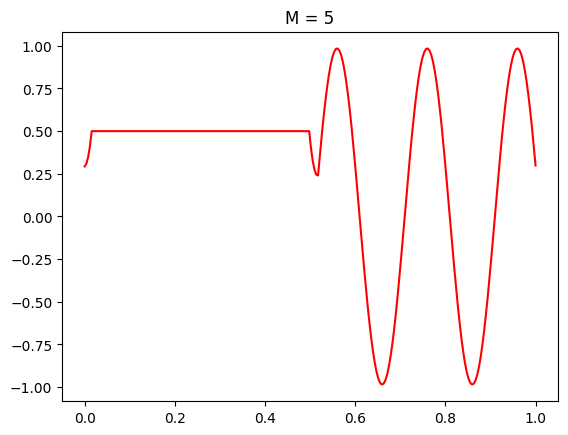

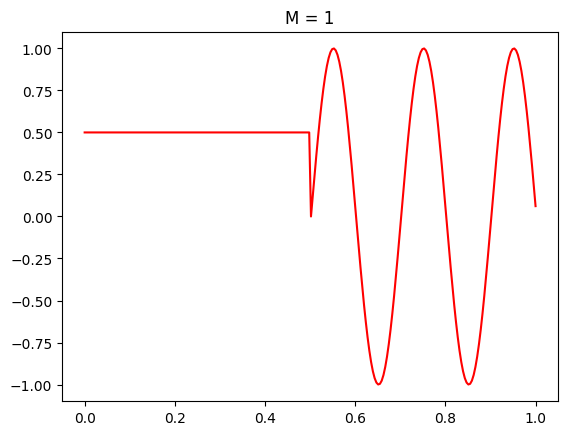

In [31]:
# Função amostrada
def f(t):
    if (t>=0) and (t<1/2):
        return np.sin(10*math.pi*t)
    else:
        return (1/2)

# Filtro
def v(n,M):
    if (n>=0) and (n<M):
        return (1/M)
    else:
        return 0

M = [256, 100, 50, 20, 10, 5, 1]
t = np.linspace(0,1,256) # Pontos amostrados
N = np.linspace(0,255,256) # Pontos amostrados
f = np.array([f(x) for x in t])
ft = np.fft.fft(f)
v = [np.array([v(x,m) for x in N]) for m in M]
vt = [np.fft.fft(x) for x in v] 

for i in range(0,len(M)):
    ift = np.fft.ifftshift(np.fft.ifft(ft*vt[i]).real)
    plt.title("M = %i" %M[i])
    plt.plot(t, ift, color="red")
    plt.show()

Para $M = 256$, o sinal da convolução é constante, pois representa apenas a componente $c_0$ de $f$. Conforme $M$ diminuí, o sinal da convolução se aproxima de $f$. Para $M = 1$, a convolução é o sinal $f$. Para os outros valores de $M$, o filtro $v$, atua como um filtro passa-baixo.

## Exercício 4.13

In [55]:
h = [1, 5, 7, 2] # Vetor escolhido
ft = np.fft.fft(f) # DFT
Mh = circulant(h) # Matriz circulante
print("DFT de h:")
print(ft)
print("\n")
print("Matriz Circulante:")
print(Mh)
print("\n")
eigenvalues, eigenvectors = np.linalg.eig(Mh) # Autovalores e autovetores
print("Autovetores:")
print(eigenvectors)
print("\n")
print("Autovalores:")
print(eigenvalues)

DFT de h:
[ 8.02286705e+01+0.00000000e+00j -5.14768582e-01+4.06378336e+01j
  1.92892559e+01+2.36915751e-01j -5.06850142e-01+1.31101212e+01j
  4.44454380e+01+1.09145266e+00j  1.44362851e+00-5.56964933e+01j
 -3.78150156e+01-1.39224133e+00j -5.47095938e-01+6.54291820e+00j
 -1.05209456e+01-5.16102293e-01j -5.37751185e-01+4.91204168e+00j
 -5.45273131e+00-3.34045931e-01j -5.34848933e-01+3.96804528e+00j
 -3.42951124e+00-2.51833430e-01j -5.33497474e-01+3.33259861e+00j
 -2.38235499e+00-2.03819713e-01j -5.32741480e-01+2.87190207e+00j
 -1.76043637e+00-1.71855872e-01j -5.32270521e-01+2.52130055e+00j
 -1.35755000e+00-1.48820066e-01j -5.31955290e-01+2.24491482e+00j
 -1.08028371e+00-1.31311351e-01j -5.31733089e-01+2.02105028e+00j
 -8.80720176e-01-1.17485279e-01j -5.31570192e-01+1.83576309e+00j
 -7.32009648e-01-1.06247954e-01j -5.31447018e-01+1.67966327e+00j
 -6.18074359e-01-9.69061143e-02j -5.31351517e-01+1.54618814e+00j
 -5.28773441e-01-8.89973461e-02j -5.31275919e-01+1.43060914e+00j
 -4.57437036e-0

Podemos verificar o teorema 4.3 encontrando os autovalores na DFT de h.